### Outliers

Impact of outliers on a dataset

Which machine learning models to the outliers

1.Naive Bayes Classifier - Not sensitive to outliers

2.SVM - Not sensitive to outliers

3.Linear Regression - sensitive to outliers

4.Logistic Regression - sensitive to outliers

5.Random Forest - Not sensitive to outliers

6.Decission Tree Regressor or Classifier - Not sensitive to outliers

7.KNN - Not sensitive to outliers

8.Kmeans - sensitive to outliers

9.Hierarchical - sensitive to outliers

10.PCA - sensitive to outliers

11.Neural Networks - sensitive to outliers


ALL unsupervised techniques are sensitive for the outliers

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/home/shivasai7392/Desktop/DS/Datasets/Titanic/titanic_train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

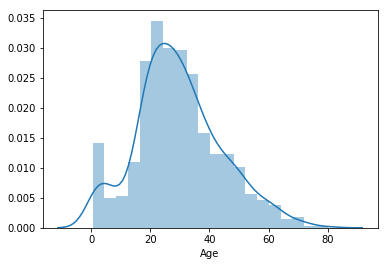

In [7]:
sns.distplot(data.Age.dropna())

In [8]:
data["Age_out"] = data.Age.fillna(150)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_out
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


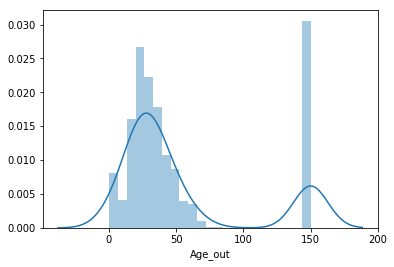

In [10]:
sns.distplot(data.Age_out)

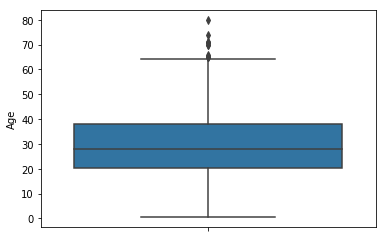

In [12]:
sns.boxplot(y =data.Age)

In [13]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [22]:
#AssumAge follows Gaussian Dist we will calculate the boundaries which differentiates the outliers

ub = data.Age.mean()+3 * data.Age.std()

In [23]:
lb = data.Age.mean() - 3 * data.Age.std()


In [24]:
ub

73.27860964406094

In [25]:
lb

-13.880374349943303

lets compute interquantile range

IQR = 75th percentile - 25th percentile

In [26]:
IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

In [27]:
IQR

17.875

In [29]:
lower_bridge = data.Age.quantile(0.25)-(IQR*1.5)

In [30]:
upper_bridge = data.Age.quantile(0.75)+(IQR*1.5)

In [31]:
lower_bridge

-6.6875

In [32]:
upper_bridge

64.8125

In [33]:
Ex_lower_bridge = data.Age.quantile(0.25)-(IQR*3)
Ex_upper_bridge = data.Age.quantile(0.75)+(IQR*3)

In [34]:
Ex_lower_bridge

-33.5

In [35]:
Ex_upper_bridge

91.625

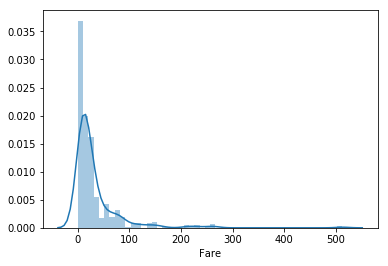

In [36]:
sns.distplot(data.Fare)

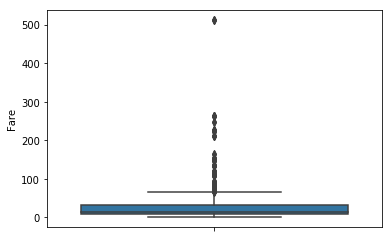

In [37]:
sns.boxplot(y=data.Fare)

In [38]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
ub_Fare = data.Fare.mean()+3 * data.Fare.std()
lb_Fare = data.Fare.mean() - 3 * data.Fare.std()


In [40]:
IQR_Fare = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

In [41]:
lower_bridge_Fare = data.Fare.quantile(0.25)-(IQR_Fare*1.5)
upper_bridge_Fare = data.Fare.quantile(0.75)+(IQR_Fare*1.5)

In [42]:
Ex_lower_bridge_Fare_Fare = data.Fare.quantile(0.25)-(IQR_Fare*3)
Ex_upper_bridge_Fare = data.Fare.quantile(0.75)+(IQR_Fare*3)

In [43]:
print(ub_Fare)
print(lb_Fare )
print(lower_bridge_Fare)
print(upper_bridge_Fare)
print(Ex_lower_bridge_Fare_Fare)
print(Ex_upper_bridge_Fare)

181.2844937601173
-116.87607782296804
-26.724
65.6344
-61.358399999999996
100.2688


Note : if ur dustibution gaussion or normal just use the boundaries
    
    but if ur distribution is skewed use extereme deviation using IQR

In [50]:
data.loc[data.Fare>=65,"Fare"] = 65

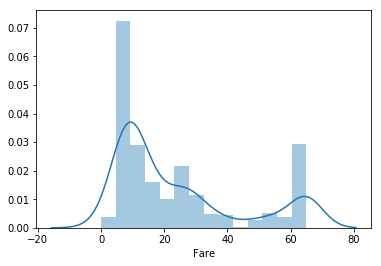

In [51]:
sns.distplot(data.Fare)

In [49]:
data.Fare.describe()

count    891.000000
mean      24.945239
std       22.572686
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       93.500000
Name: Fare, dtype: float64

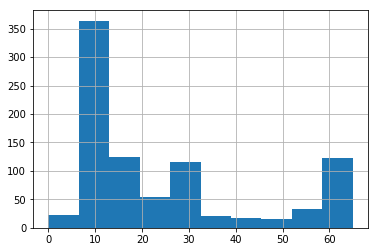

In [52]:
data.Fare.hist()